## Лабораторная работа №1 | Вариант 6

Выполнил: 

### 1. Numpy

In [95]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [96]:
identity_matrix = np.eye(3)
print(identity_matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте матрицу 5х5 со значениями 1, 2, 3, 4 ниже диагонали

In [97]:
matrix = np.diag([1, 2, 3, 4], k=-1)
print(matrix)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


3. Какой выход будет у данного скрипта

```python
# Author: Jake VanderPlas

print(sum(range(5),-1))
from numpy import *
print(sum(range(5),-1))
```

In [98]:
#9
#10

4. Как найти самое часто встречаемое значение между двумя массивами? 

In [99]:
arr1 = np.array([1, 2, 3, 4, 2, 2, 1])
arr2 = np.array([2, 3, 3, 5, 2, 1])

combined = np.concatenate([arr1, arr2])
values, counts = np.unique(combined, return_counts=True)
most_frequent = values[np.argmax(counts)]
print(most_frequent)

2


5. Как игнорировать все warnings в numpy(не нужно так делать, но покажи)?

In [100]:
np.seterr(all='ignore')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

6. Реализуем функцию-генератор, которая генерирует 10 целых чисел и используем ее для построения массива

In [101]:
def number_generator():
    for i in range(10):
        yield i

In [102]:
gen_array = np.fromiter(number_generator(), dtype=int)
print(gen_array)

[0 1 2 3 4 5 6 7 8 9]


7. Создайте массив случайных чисел размером 10 и отсортируйте его

In [103]:
random_array = np.random.rand(10)
sorted_array = np.sort(random_array)
print(random_array)
print(sorted_array)

[0.68722449 0.17616195 0.88430812 0.23536639 0.74586314 0.70199246
 0.09233335 0.24325572 0.6142883  0.13818684]
[0.09233335 0.13818684 0.17616195 0.23536639 0.24325572 0.6142883
 0.68722449 0.70199246 0.74586314 0.88430812]


8. Создайте случайную матрицу 10х2 которая представляет собой декартовые координаты и преобразуйте их в полярные

In [104]:
coords = np.random.rand(10, 2) * 10
x = coords[:, 0]
y = coords[:, 1]

r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

polar_coords = np.column_stack([r, theta])
print(coords)
print(polar_coords)

[[7.60536167 7.80695364]
 [2.98718737 7.59072482]
 [9.81352913 6.18137054]
 [3.96294134 4.12195799]
 [7.19208212 6.01301034]
 [9.87250745 6.41937285]
 [0.26091207 4.2916748 ]
 [8.41224487 2.5040684 ]
 [7.71872747 9.33342747]
 [6.42964738 0.13413541]]
[[10.89908488  0.79847735]
 [ 8.157352    1.19587887]
 [11.59804706  0.56210265]
 [ 5.71799281  0.80506398]
 [ 9.37455805  0.69634515]
 [11.77602442  0.57653492]
 [ 4.29959855  1.51007613]
 [ 8.7770281   0.28931732]
 [12.11163168  0.8798085 ]
 [ 6.43104639  0.02085899]]


9. Создайте структурированный массив который будет описывать пиксель(координату x, y и цвет r,g,b)

In [105]:
pixel_dtype = np.dtype([
    ('x', 'i4'),
    ('y', 'i4'), 
    ('r', 'u1'),
    ('g', 'u1'),
    ('b', 'u1')
])

In [106]:
pixels = np.array([
    (10, 20, 255, 0, 0),
    (30, 40, 0, 255, 0),
    (50, 60, 0, 0, 255),
    (70, 80, 255, 255, 0)
], dtype=pixel_dtype)

print(pixels)

[(10, 20, 255,   0,   0) (30, 40,   0, 255,   0) (50, 60,   0,   0, 255)
 (70, 80, 255, 255,   0)]


10. Как конвертировать тип массив от float32 в int32 in place?

In [107]:
float_array = np.array([1.1, 2.9, 3.5, 4.1], dtype=np.float32)
print(float_array)

float_array = float_array.astype(np.int32, copy=False)
print(float_array)

[1.1 2.9 3.5 4.1]
[1 2 3 4]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Набор данных описывает эффективность учеников в зависимости от некоторых факторов влияющих на обучение и окружение человека.

Файл: `student_perfomance.csv`

```
Hours_Studied - количество часов затраченное на обучение в неделю
Attendance - поцент посещенных занятий
Parental_Involvement - уровень участия родителей в обучении учащегося
Access_to_Resources - доступность ресурсов для обучения
Extracurricular_Activities - участие во внеклассных мероприятиях
Sleep_Hours - количество часов выделяемое на сон в день
Previous_Scores - оценка за первый экзамен
Motivation_Level - уровень мотивации
Internet_Access - доступ к интернету
Tutoring_Sessions - количество посещаемых репетиторских занятий в месяц.
Family_Income - доход семьи
Teacher_Quality - насколько качественно преподает учитель
School_Type - тип школы(частная, обычная)
Peer_Influence - влияние сверстников
Physical_Activity - физическая активность
Learning_Disabilities - наличие проблем с обучаемостью
Parental_Education_Level - уровень образования родителей
Distance_from_Home - дистанция от дома до школы
Gender - пол
Exam_Score - оценка на конечном экзамене
```

In [108]:
import pandas as pd

In [109]:
path = 'D:/Projects/MLLabs/Variant 6/student_perfomance.csv'

In [110]:
df = pd.read_csv(path)

1. Посчитайте среднее кол-во часов уделяемое на сон студентами

In [111]:
average_sleep_hours = df['Sleep_Hours'].mean()
print(average_sleep_hours)

7.029060087785682


2. Сколько процентов студентов посещают внеклассовые активности?

In [112]:
percentage = (df['Extracurricular_Activities'] == 'Yes').mean() * 100
print(percentage)

59.60345088542455


3. Правда ли, что в среднем девушки сдают экзамены лучше, чем мужчины

In [113]:
gender_scores = df.groupby('Gender')['Exam_Score'].mean()
if len(gender_scores) > 1:
    girls_better = gender_scores['Female'] > gender_scores['Male']
    print(girls_better)

True


4. Выведите 25 и 75 перцентили времени сна студентов

In [114]:
sleep_percentiles = df['Sleep_Hours'].quantile([0.25, 0.75])
print(sleep_percentiles[0.25])
print(sleep_percentiles[0.75])

6.0
8.0


5. Правда ли, что те, кто спит больше(75 перцентиль и выше) сдает экзамен лучше, чем студенты с недосыпом(25 перцентиль и меньше)

In [115]:
sleep_75 = sleep_percentiles[0.75]
sleep_25 = sleep_percentiles[0.25]

well_rested = df[df['Sleep_Hours'] >= sleep_75]
sleep_deprived = df[df['Sleep_Hours'] <= sleep_25]

well_rested_score = well_rested['Exam_Score'].mean()
sleep_deprived_score = sleep_deprived['Exam_Score'].mean()

print(well_rested_score > sleep_deprived_score)

False


6. Влияет ли физическая активность на результаты экзамена?

In [116]:
physical_activity_corr = df['Physical_Activity'].corr(df['Exam_Score'])

if df['Physical_Activity'].dtype == 'object':
    activity_scores = df.groupby('Physical_Activity')['Exam_Score'].mean().sort_values(ascending=False)
else:
    df['Activity_Level'] = pd.cut(df['Physical_Activity'], bins=3, labels=['Low', 'Medium', 'High'])
    activity_scores = df.groupby('Activity_Level')['Exam_Score'].mean()
print(activity_scores)

Activity_Level
Low       67.148997
Medium    67.240777
High      67.643766
Name: Exam_Score, dtype: float64


C:\Users\surge\AppData\Local\Temp\ipykernel_16100\2475103560.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_scores = df.groupby('Activity_Level')['Exam_Score'].mean()


7. Правда ли, что слуденты, чьи родители имеют высшее образование(College || Postgraduate), сдают экзамены лучше, чем остальные?

In [117]:
higher_education = ['College', 'Postgraduate']

df['Parent_Higher_Education'] = df['Parental_Education_Level'].isin(higher_education)

higher_ed_scores = df.groupby('Parent_Higher_Education')['Exam_Score'].mean()
print(higher_ed_scores[True] > higher_ed_scores[False])

True


8. Как влияет участие родителей на результаты экзаменов

In [118]:
involvement_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Parental_Involvement_Num'] = df['Parental_Involvement'].map(involvement_mapping)

parental_corr = df['Parental_Involvement_Num'].corr(df['Exam_Score'])

parental_scores = df.groupby('Parental_Involvement')['Exam_Score'].mean()
for level, score in parental_scores.items():
    print(f"   {level}: {score:.2f}")

   High: 68.09
   Low: 66.36
   Medium: 67.10


9. Правда ли, что в семьях с доходом больше среднего дети сдают экзамены лучше?

In [119]:
income_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Family_Income_Num'] = df['Family_Income'].map(income_mapping)

df['Above_Average_Income'] = df['Family_Income'] == 'High'

income_scores = df.groupby('Family_Income')['Exam_Score'].mean()

high_income_score = income_scores.get('High', 0)
other_income_score = income_scores[income_scores.index != 'High'].mean()

print(high_income_score > other_income_score)

True


10. Посчитайте долю студентов сдавших экзамен на более чем 70 баллов в семьях с низким доходом и отсутствием доступа к интернету

In [120]:
low_income_no_internet = df[
    (df['Family_Income'] == 'Low') & 
    (df['Internet_Access'] == 'No')
]

if len(low_income_no_internet) > 0:
    high_scorers = low_income_no_internet[low_income_no_internet['Exam_Score'] > 70]
    percentage = (len(high_scorers) / len(low_income_no_internet)) * 100
else:
    percentage = 0

print(percentage)

8.056872037914692


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

1. Правда ли, что количество часов затрачиваемых на сон распределено примерно нормально?

D:\Projects\MLLabs\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6607.
  res = hypotest_fun_out(*samples, **kwds)


Text(0.05, 0.95, 'p-value: 0.0000')

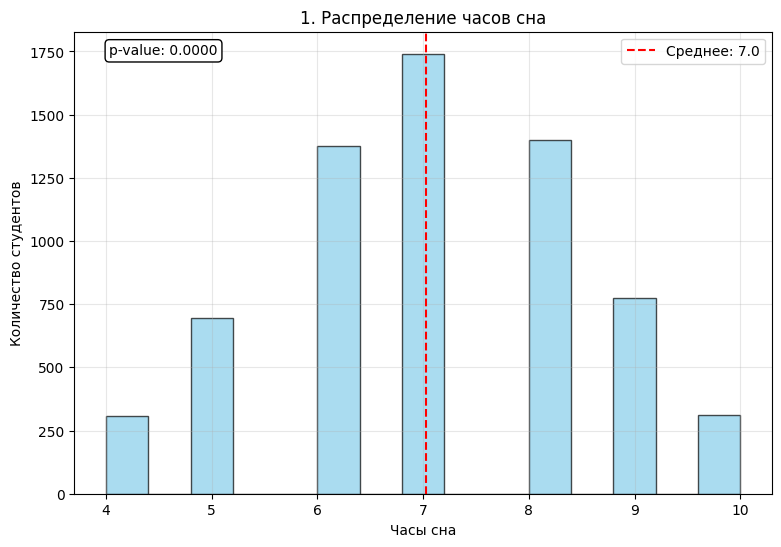

In [122]:
plt.style.use('default')
fig, axes = plt.subplots(1, 1, figsize=(9, 6))

axes.hist(df['Sleep_Hours'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes.axvline(df['Sleep_Hours'].mean(), color='red', linestyle='--', label=f'Среднее: {df["Sleep_Hours"].mean():.1f}')
axes.set_xlabel('Часы сна')
axes.set_ylabel('Количество студентов')
axes.set_title('1. Распределение часов сна')
axes.legend()
axes.grid(True, alpha=0.3)

sleep_normality = stats.shapiro(df['Sleep_Hours'])
axes.text(0.05, 0.95, f'p-value: {sleep_normality.pvalue:.4f}', 
                transform=axes.transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))


2. Постройте гистограмму распределения количества часов затрачиваемых на обучение среди мальчиков и девочек

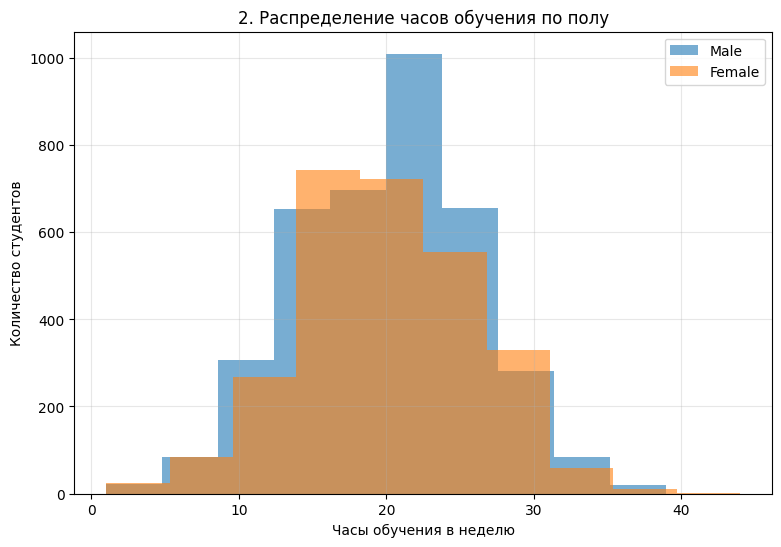

In [123]:
plt.style.use('default')
fig, axes = plt.subplots(1, 1, figsize=(9, 6))

for gender in df['Gender'].unique():
    gender_data = df[df['Gender'] == gender]['Hours_Studied']
    axes.hist(gender_data, bins=10, alpha=0.6, label=gender)

axes.set_xlabel('Часы обучения в неделю')
axes.set_ylabel('Количество студентов')
axes.set_title('2. Распределение часов обучения по полу')
axes.legend()
axes.grid(True, alpha=0.3)

3. Как зависит результат конечного экзамена от результата первого экзамена

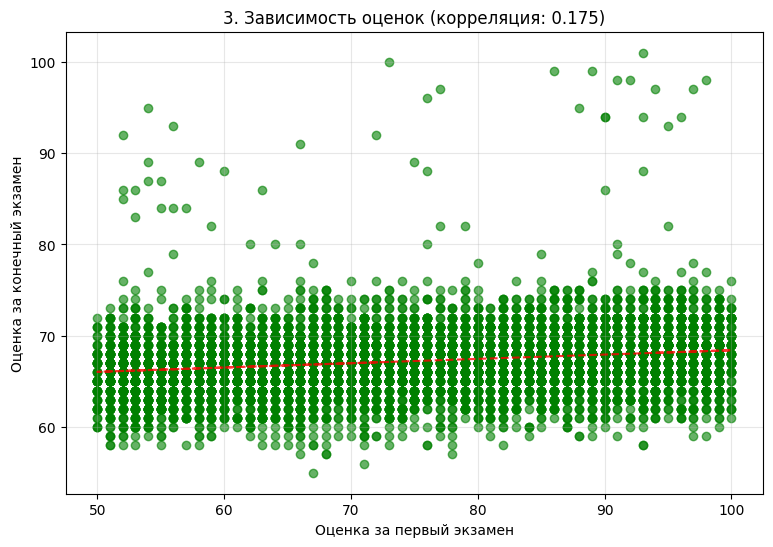

In [124]:
plt.style.use('default')
fig, axes = plt.subplots(1, 1, figsize=(9, 6))

axes.scatter(df['Previous_Scores'], df['Exam_Score'], alpha=0.6, color='green')
z = np.polyfit(df['Previous_Scores'], df['Exam_Score'], 1)
p = np.poly1d(z)
axes.plot(df['Previous_Scores'], p(df['Previous_Scores']), "r--", alpha=0.8)

correlation = df['Previous_Scores'].corr(df['Exam_Score'])
axes.set_xlabel('Оценка за первый экзамен')
axes.set_ylabel('Оценка за конечный экзамен')
axes.set_title(f'3. Зависимость оценок (корреляция: {correlation:.3f})')
axes.grid(True, alpha=0.3)

4. Постройте box plot отображающий распределение количества сна детей сдавших экзамены на оценку ниже и выше 85 баллов

C:\Users\surge\AppData\Local\Temp\ipykernel_16100\3965484076.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['Низкая', 'Высокая'])


[Text(0, 0, 'Низкая'), Text(1, 0, 'Высокая')]

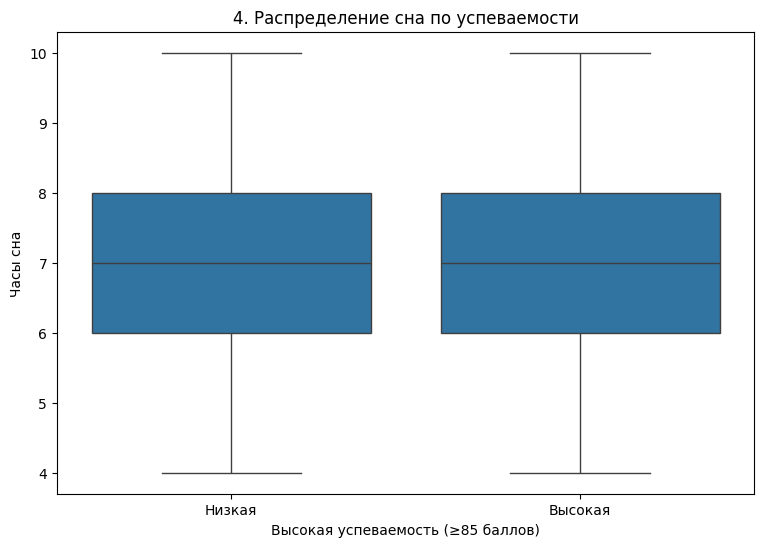

In [125]:
plt.style.use('default')
fig, axes = plt.subplots(1, 1, figsize=(9, 6))

df['High_Achiever'] = df['Exam_Score'] >= 85
sns.boxplot(x='High_Achiever', y='Sleep_Hours', data=df, ax=axes)
axes.set_xlabel('Высокая успеваемость (≥85 баллов)')
axes.set_ylabel('Часы сна')
axes.set_title('4. Распределение сна по успеваемости')
axes.set_xticklabels(['Низкая', 'Высокая'])


5. Правда ли, что количество посещаемых занятий с репетитором в месяц напрямую влияет на балл в конечном экзамене?

C:\Users\surge\AppData\Local\Temp\ipykernel_16100\1899799682.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tutoring_scores = df.groupby(tutoring_bins)['Exam_Score'].mean()


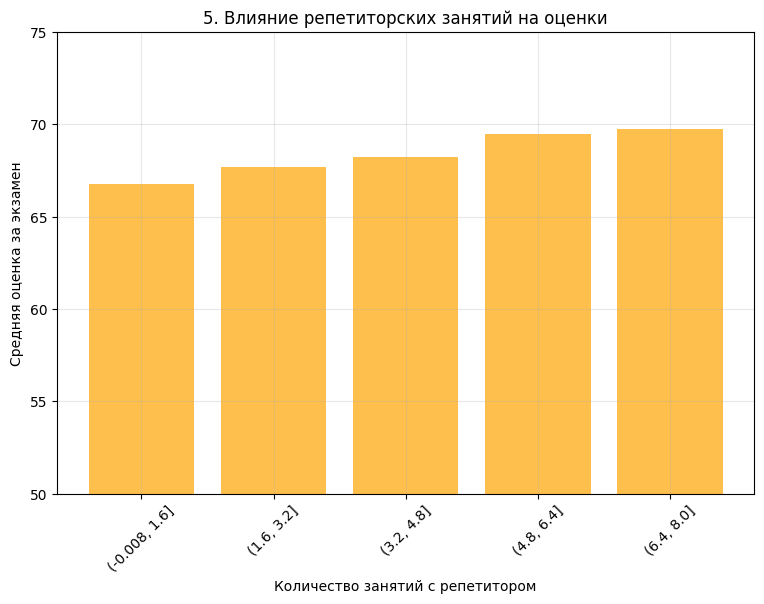

In [126]:
plt.style.use('default')
fig, axes = plt.subplots(1, 1, figsize=(9, 6))
plt.ylim(50, 75)

tutoring_bins = pd.cut(df['Tutoring_Sessions'], bins=5)
tutoring_scores = df.groupby(tutoring_bins)['Exam_Score'].mean()

axes.bar(range(len(tutoring_scores)), tutoring_scores.values, color='orange', alpha=0.7)
axes.set_xlabel('Количество занятий с репетитором')
axes.set_ylabel('Средняя оценка за экзамен')
axes.set_title('5. Влияние репетиторских занятий на оценки')
axes.set_xticks(range(len(tutoring_scores)))
axes.set_xticklabels([str(x) for x in tutoring_scores.index], rotation=45)
axes.grid(True, alpha=0.3)



6. Как физическая активность влияет на успеваемость?

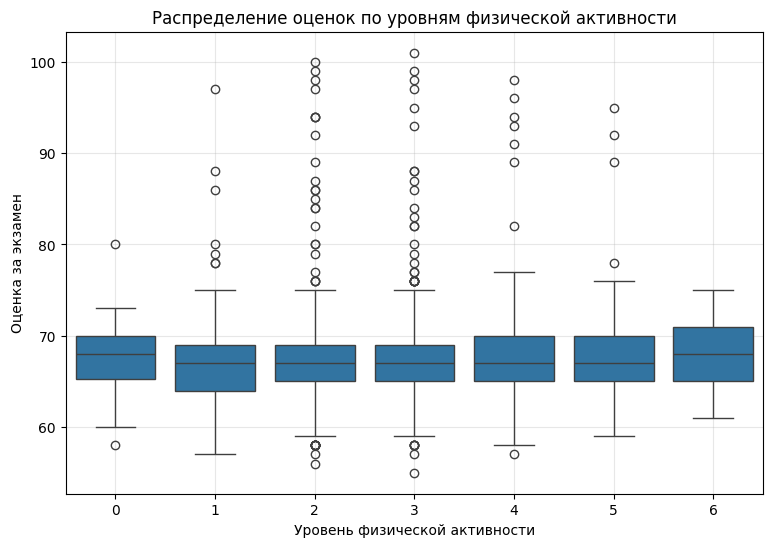

In [127]:
plt.style.use('default')
fig, axes = plt.subplots(1, 1, figsize=(9, 6))

sns.boxplot(x='Physical_Activity', y='Exam_Score', data=df, ax=axes)
axes.set_xlabel('Уровень физической активности')
axes.set_ylabel('Оценка за экзамен')
axes.set_title('Распределение оценок по уровням физической активности')
axes.grid(True, alpha=0.3)

7. Постройте HeatMap где ось Х - процент посещаемость, Y - количество занятий с репетитором, а Z - балл за итоговый экзамен*

\* Задание на доп. балл